To understand this document here are PDFs explaining the data calculated and what the labels mean. [Technical Documentation and User Guide](https://www.epa.gov/system/files/documents/2023-10/epa_sld_3.0_technicaldocumentationuserguide_may2021_0.pdf)

To understand walkability index equation. [Methodology and User Index](https://www.epa.gov/sites/default/files/2021-06/documents/national_walkability_index_methodology_and_user_guide_june2021.pdf)


In [142]:
import pandas as pd
import os
import numpy as np
import pathlib
import matplotlib.pyplot as plt
%matplotlib widget

# Set The Directory For The Data
data_dir = '../Resources'

# Set The Directory For The Output
output_dir = 'Output'

cwd = pathlib.Path().resolve()

# Load the data
walkability_df = pd.read_csv(f'{data_dir}/EPA_SmartLocationDatabase_V3_Jan_2021_Final.csv')




In [143]:
# Display the data Columns and D-type configurations
walkability_df.info(verbose = True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220740 entries, 0 to 220739
Data columns (total 117 columns):
 #    Column        Dtype  
---   ------        -----  
 0    OBJECTID      int64  
 1    GEOID10       float64
 2    GEOID20       float64
 3    STATEFP       int64  
 4    COUNTYFP      int64  
 5    TRACTCE       int64  
 6    BLKGRPCE      int64  
 7    CSA           float64
 8    CSA_Name      object 
 9    CBSA          float64
 10   CBSA_Name     object 
 11   CBSA_POP      int64  
 12   CBSA_EMP      int64  
 13   CBSA_WRK      int64  
 14   Ac_Total      float64
 15   Ac_Water      float64
 16   Ac_Land       float64
 17   Ac_Unpr       float64
 18   TotPop        int64  
 19   CountHU       float64
 20   HH            float64
 21   P_WrkAge      float64
 22   AutoOwn0      int64  
 23   Pct_AO0       float64
 24   AutoOwn1      int64  
 25   Pct_AO1       float64
 26   AutoOwn2p     int64  
 27   Pct_AO2p      float64
 28   Workers       int64  
 29   R_LowWageWk   

In [144]:
walkability_df.columns

Index(['OBJECTID', 'GEOID10', 'GEOID20', 'STATEFP', 'COUNTYFP', 'TRACTCE',
       'BLKGRPCE', 'CSA', 'CSA_Name', 'CBSA',
       ...
       'D5DRI', 'D5DE', 'D5DEI', 'D2A_Ranked', 'D2B_Ranked', 'D3B_Ranked',
       'D4A_Ranked', 'NatWalkInd', 'Shape_Length', 'Shape_Area'],
      dtype='object', length=117)

In [145]:
# Rename Essential Data Columns For Clarification Purposes
walkability_df.rename(columns={'D2A_Ranked':'Quantile Ranked Order D2A', 'D2B_Ranked':'Quantile Ranked Order D2B', 'D3B_Ranked':'Quantile Ranked Order D3B', 'D4A_Ranked':'Quantile Ranked Order D4A'},inplace=True)
walkability_df.head(10)

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,D5DRI,D5DE,D5DEI,Quantile Ranked Order D2A,Quantile Ranked Order D2B,Quantile Ranked Order D3B,Quantile Ranked Order D4A,NatWalkInd,Shape_Length,Shape_Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
5,6,4.811300e+11,4.811300e+11,48,113,7827,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.189063,0.000467,0.135336,1,4,5,13,6.833333,3109.651786,2.051268e+05
6,7,4.811300e+11,4.811300e+11,48,113,9301,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.012107,0.000184,0.053166,1,1,10,13,8.000000,4345.799339,8.119811e+05
7,8,4.811300e+11,4.811300e+11,48,113,1102,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.375864,0.001031,0.298647,9,12,13,16,13.166667,2248.148479,2.589736e+05
8,9,4.811300e+11,4.811300e+11,48,113,11401,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000030,0.000005,0.001318,3,2,11,18,10.500000,8246.622195,2.479375e+06
9,10,4.811300e+11,4.811300e+11,48,113,11401,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000012,0.000006,0.001745,1,1,10,15,8.666667,3669.658355,7.574020e+05


In [146]:
# Rename Essential Data Columns For Clarification Purposes Part 2
walkability_df.rename(columns={'NatWalkind':'Weighted Sum of Ranked Values', 'D5DRI':'Regional Centrality Index', 'Shape_Length':'Shape Length', 'Shape_Area':'Shape Area', 'STATEFP':'State FIPS Code', 'COUNTYFP':'County FIPS Code', 'TRACTCE':'Census FIPS Code', 'BLKGRPCE':'CEBLKGRP FIPS Code'},inplace=True)
walkability_df.head(10)

,OBJECTID,GEOID10,GEOID20,State FIPS Code,County FIPS Code,Census FIPS Code,CEBLKGRP FIPS Code,CSA,CSA_Name,CBSA,...,Regional Centrality Index,D5DE,D5DEI,Quantile Ranked Order D2A,Quantile Ranked Order D2B,Quantile Ranked Order D3B,Quantile Ranked Order D4A,NatWalkInd,Shape Length,Shape Area
0,1,4.811300e+11,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.184697,0.000476,0.137707,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.323221,0.000801,0.231868,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.314628,0.000736,0.213146,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.229821,0.000708,0.205018,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.164863,0.000433,0.125296,4,7,11,14,10.166667,3731.971773,6.876848e+05
5,6,4.811300e+11,4.811300e+11,48,113,7827,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.189063,0.000467,0.135336,1,4,5,13,6.833333,3109.651786,2.051268e+05
6,7,4.811300e+11,4.811300e+11,48,113,9301,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.012107,0.000184,0.053166,1,1,10,13,8.000000,4345.799339,8.119811e+05
7,8,4.811300e+11,4.811300e+11,48,113,1102,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.375864,0.001031,0.298647,9,12,13,16,13.166667,2248.148479,2.589736e+05
8,9,4.811300e+11,4.811300e+11,48,113,11401,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000030,0.000005,0.001318,3,2,11,18,10.500000,8246.622195,2.479375e+06
9,10,4.811300e+11,4.811300e+11,48,113,11401,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,...,0.000012,0.000006,0.001745,1,1,10,15,8.666667,3669.658355,7.574020e+05


# Equation For Walkability Index Obtained From Methodology and User Guide PDF
w = block group’s ranked score for intersection density
x = block group’s ranked score for proximity to transit stops
y = block group’s ranked score for employment mix
z = block group’s ranked score for employment and household mix

Final National Walkability Index score = w/3+x/3+y/6+z/6

In [147]:
# Dropping Columns That Do Not Provide Walkability Information
walkability_df.drop(columns=['GEOID10', 'D5DE', 'D5DEI'], inplace=True)
walkability_df

,OBJECTID,GEOID20,State FIPS Code,County FIPS Code,Census FIPS Code,CEBLKGRP FIPS Code,CSA,CSA_Name,CBSA,CBSA_Name,...,D5CEI,D5DR,Regional Centrality Index,Quantile Ranked Order D2A,Quantile Ranked Order D2B,Quantile Ranked Order D3B,Quantile Ranked Order D4A,NatWalkInd,Shape Length,Shape Area
0,1,4.811300e+11,48,113,7825,4,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,0.841299,0.000525,0.184697,6,14,15,17,14.000000,3110.360820,2.978361e+05
1,2,4.811300e+11,48,113,7825,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,0.753958,0.000919,0.323221,3,10,12,14,10.833333,3519.469110,4.849451e+05
2,3,4.811300e+11,48,113,7825,3,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,0.800475,0.000894,0.314628,1,1,7,17,8.333333,1697.091802,1.067059e+05
3,4,4.811300e+11,48,113,7824,1,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,0.825778,0.000653,0.229821,16,10,17,17,15.666667,2922.609204,4.818284e+05
4,5,4.811300e+11,48,113,7824,2,206.0,"Dallas-Fort Worth, TX-OK",19100.0,"Dallas-Fort Worth-Arlington, TX",...,0.659846,0.000469,0.164863,4,7,11,14,10.166667,3731.971773,6.876848e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220735,220736,7.803100e+11,78,30,961000,2,NaN,NaN,NaN,NaN,...,0.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,3414.446949,3.355857e+05
220736,220737,7.803100e+11,78,30,961000,3,NaN,NaN,NaN,NaN,...,0.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,2421.025608,2.924305e+05
220737,220738,7.803100e+11,78,30,961000,5,NaN,NaN,NaN,NaN,...,0.000000,-99999.000000,-99999.000000,1,1,20,1,7.333333,1955.909418,1.619395e+05
220738,220739,7.803100e+11,78,30,960700,3,NaN,NaN,NaN,NaN,...,0.000000,-99999.000000,-99999.000000,1,1,10,1,4.000000,16896.768870,1.038966e+07


In [148]:
# Creating New DataFrame With New CSA Variable
ny_walkability = walkability_df.dropna(subset=['CSA_Name'])

In [149]:
ny_walkability = ny_walkability[ny_walkability['CSA_Name'].str.contains('New York')]
ny_walkability

,OBJECTID,GEOID20,State FIPS Code,County FIPS Code,Census FIPS Code,CEBLKGRP FIPS Code,CSA,CSA_Name,CBSA,CBSA_Name,...,D5CEI,D5DR,Regional Centrality Index,Quantile Ranked Order D2A,Quantile Ranked Order D2B,Quantile Ranked Order D3B,Quantile Ranked Order D4A,NatWalkInd,Shape Length,Shape Area
58184,58185,9.009176e+10,9,9,175600,4,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,"New Haven-Milford, CT",...,0.778411,-99999.000000,-99999.000000,9,2,7,1,4.500000,8236.865601,1.624616e+06
58192,58193,9.009176e+10,9,9,175600,5,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,"New Haven-Milford, CT",...,0.663507,-99999.000000,-99999.000000,2,5,6,1,3.500000,8777.035548,2.416333e+06
58193,58194,9.009176e+10,9,9,175900,4,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,"New Haven-Milford, CT",...,0.832078,0.000396,0.052302,5,9,11,18,12.000000,4825.037612,9.830159e+05
58194,58195,9.009176e+10,9,9,176000,2,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,"New Haven-Milford, CT",...,0.622311,-99999.000000,-99999.000000,4,8,6,1,4.333333,10455.970620,4.455149e+06
58205,58206,9.009184e+10,9,9,184100,1,408.0,"New York-Newark, NY-NJ-CT-PA",35300.0,"New Haven-Milford, CT",...,0.482907,0.002203,0.291252,18,18,11,15,14.666667,5421.180302,7.689398e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194773,194774,4.208930e+11,42,89,301001,2,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,"East Stroudsburg, PA",...,0.717823,-99999.000000,-99999.000000,19,12,7,1,7.833333,13774.401490,8.190772e+06
194774,194775,4.208930e+11,42,89,300501,2,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,"East Stroudsburg, PA",...,0.601742,-99999.000000,-99999.000000,17,17,6,1,8.000000,27009.280830,2.305892e+07
195129,195130,4.208930e+11,42,89,300800,1,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,"East Stroudsburg, PA",...,0.808408,0.088178,0.953047,20,17,15,19,17.500000,3637.921836,5.419934e+05
195130,195131,4.208930e+11,42,89,301302,1,408.0,"New York-Newark, NY-NJ-CT-PA",20700.0,"East Stroudsburg, PA",...,0.546344,-99999.000000,-99999.000000,8,11,4,1,4.833333,33811.517380,3.253632e+07


In [150]:
# Displaying Simple Array
ny_walkability['CSA_Name'].unique()

array(['New York-Newark, NY-NJ-CT-PA'], dtype=object)

In [151]:
# FIPS File Readability
fips = pd.read_csv(os.path.join(cwd, data_dir, 'fips2county.tsv'), sep='\t')

# ny_fips = fips[fips['StateName'] == 'NY'].values[0]
nyc_fips = fips[(fips['CountyName'].isin(['New York', 'Bronx', 'Kings', 'Queens', 'Richmond'])) & (fips['StateName'].str.contains('New York'))]

# albany_fips = ny_fips[ny_fips['county'].isin(['Albany'])]

# rochester_fips = ny_fips[ny_fips['county'].isin(['Monroe'])]

for county in nyc_fips['CountyCBSA'].values:
    nyc_walkindex = pd.concat([walkability_df, walkability_df[
        (walkability_df['CBSA'] == county)
    ]])

nyc_walkindex = nyc_walkindex.drop_duplicates()

nyc_walkindex['NatWalkInd'].mean()

9.541628159832273

In [152]:
display(nyc_fips)

,StateFIPS,CountyFIPS_3,CountyName,StateName,CountyFIPS,StateAbbr,STATE_COUNTY,CountyCBSA
1831,36,5,Bronx,New York,36005,NY,NY | BRONX,35620.0
1852,36,47,Kings,New York,36047,NY,NY | KINGS,35620.0
1859,36,61,New York,New York,36061,NY,NY | NEW YORK,35620.0
1869,36,81,Queens,New York,36081,NY,NY | QUEENS,35620.0
1871,36,85,Richmond,New York,36085,NY,NY | RICHMOND,35620.0


In [153]:
# Display Walkability Index Values That Come From Methodology & User Guide PDF

nyc_walkindex['NatWalkInd'].describe()

count    220740.000000
mean          9.541628
std           4.373952
min           1.000000
25%           5.833333
50%           9.166667
75%          13.166667
max          20.000000
Name: NatWalkInd, dtype: float64

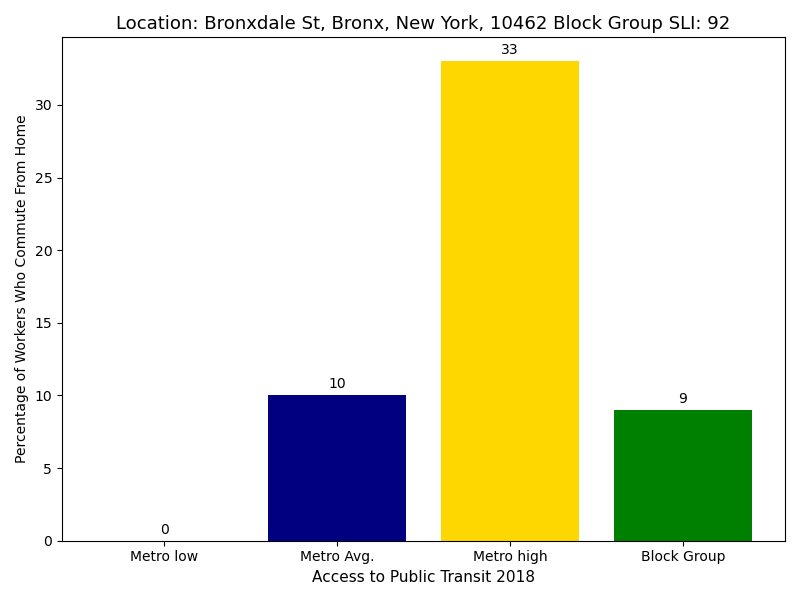

In [154]:
# Plotting Graphs According to Values & Counties Set Forth (Bronx)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group']
values = [0, 10, 33, 9]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green'])

# Add labels and title
ax.set_xlabel('Access to Public Transit 2018', fontsize=11)
ax.set_ylabel('Percentage of Workers Who Commute From Home', fontsize=10, wrap=True)
ax.set_title('Location: Bronxdale St, Bronx, New York, 10462 Block Group SLI: 92', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

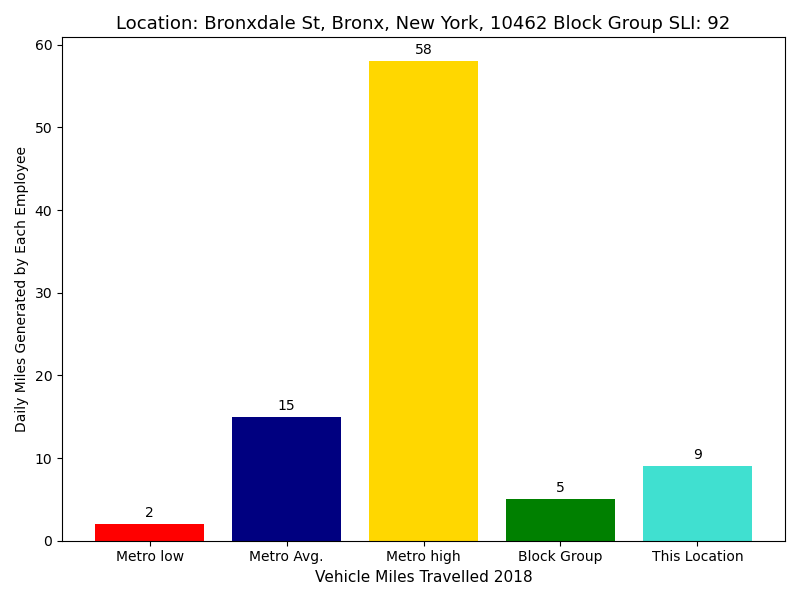

In [155]:
# Daily Miles Generated By Each Employee (Bronx)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [2, 15, 58, 5, 9]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Vehicle Miles Travelled 2018', fontsize=11)
ax.set_ylabel('Daily Miles Generated by Each Employee', fontsize=10, wrap=True)
ax.set_title('Location: Bronxdale St, Bronx, New York, 10462 Block Group SLI: 92', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

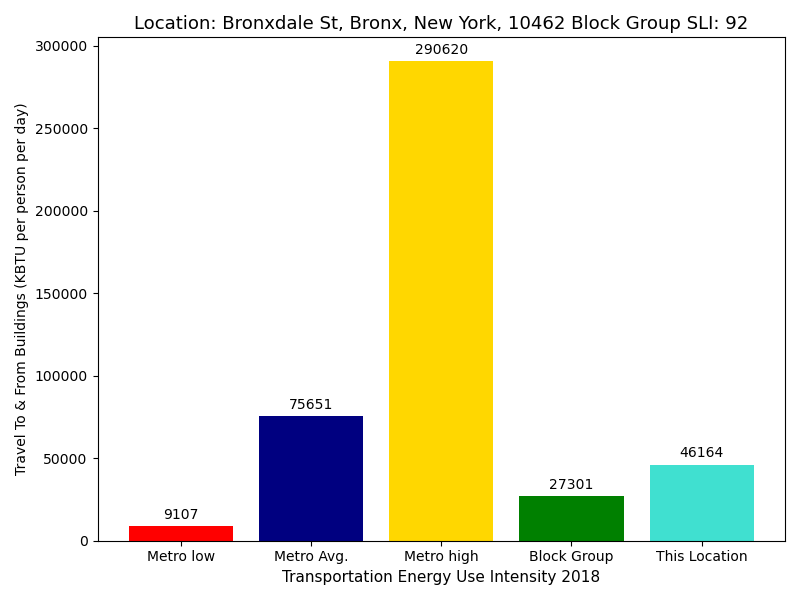

In [156]:
# Transportation Energy Use Intensity (Bronx)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [9107, 75651, 290620, 27301, 46164]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Transportation Energy Use Intensity 2018', fontsize=11)
ax.set_ylabel('Travel To & From Buildings (KBTU per person per day)', fontsize=10, wrap=True)
ax.set_title('Location: Bronxdale St, Bronx, New York, 10462 Block Group SLI: 92', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

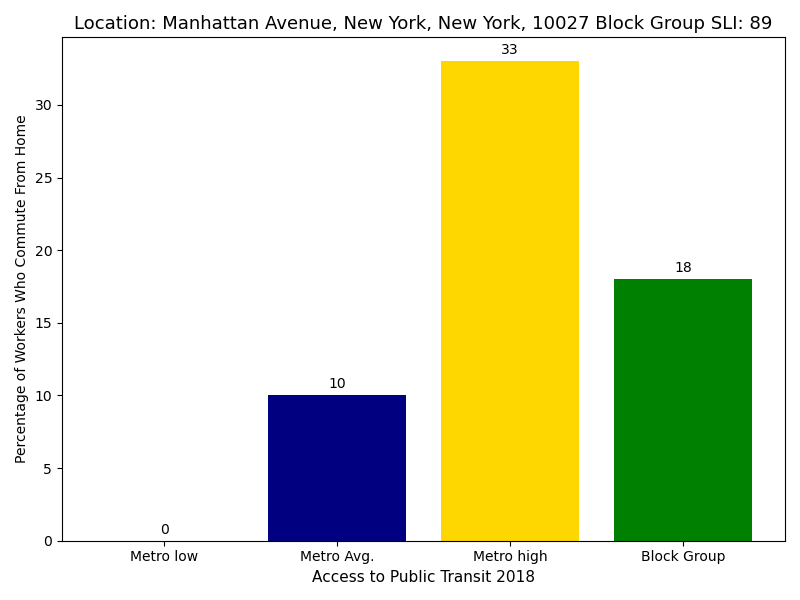

In [157]:
# Plotting Graphs According to Values & Counties Set Forth (New York - Manhattan)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group']
values = [0, 10, 33, 18]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green'])

# Add labels and title
ax.set_xlabel('Access to Public Transit 2018', fontsize=11)
ax.set_ylabel('Percentage of Workers Who Commute From Home', fontsize=10, wrap=True)
ax.set_title('Location: Manhattan Avenue, New York, New York, 10027 Block Group SLI: 89', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

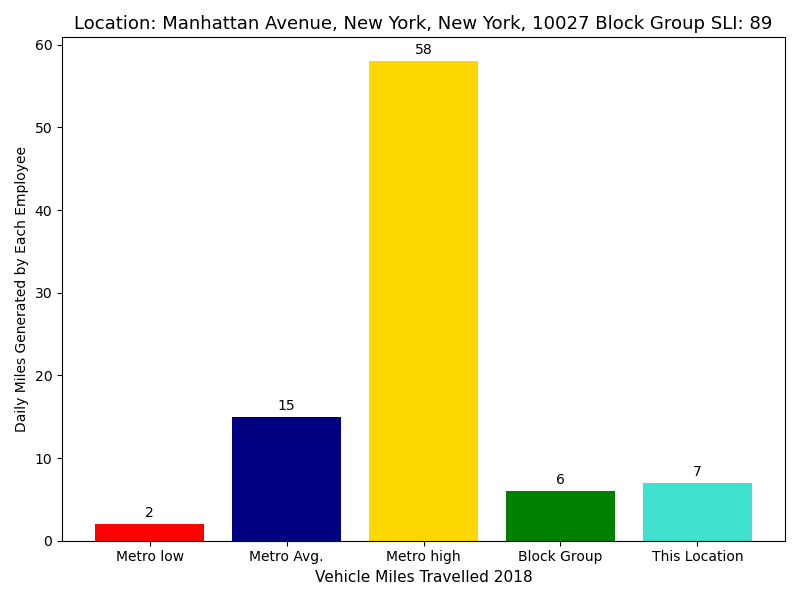

In [158]:
# Daily Miles Generated By Each Employee (New York - Manhattan)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [2, 15, 58, 6, 7]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Vehicle Miles Travelled 2018', fontsize=11)
ax.set_ylabel('Daily Miles Generated by Each Employee', fontsize=10, wrap=True)
ax.set_title('Location: Manhattan Avenue, New York, New York, 10027 Block Group SLI: 89', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

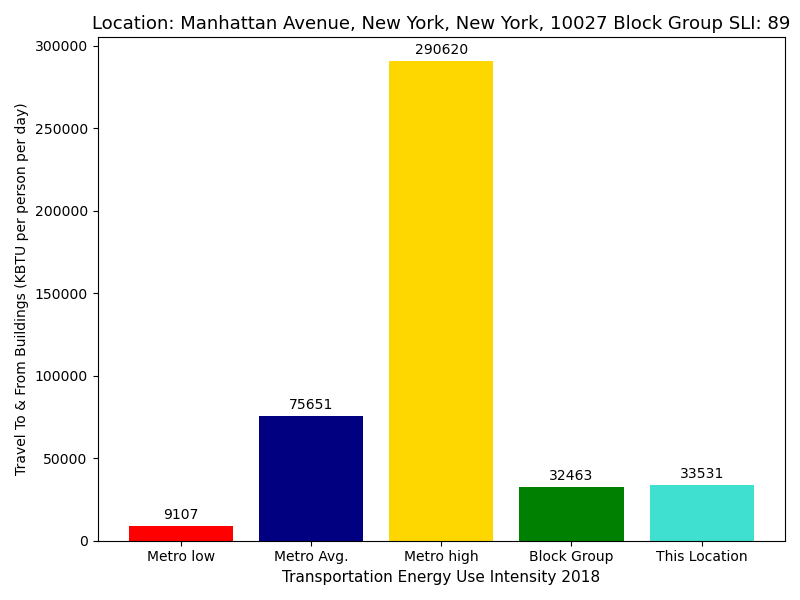

In [159]:
# Transportation Energy Use Intensity (New York - Manhattan)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [9107, 75651, 290620, 32463, 33531]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Transportation Energy Use Intensity 2018', fontsize=11)
ax.set_ylabel('Travel To & From Buildings (KBTU per person per day)', fontsize=10, wrap=True)
ax.set_title('Location: Manhattan Avenue, New York, New York, 10027 Block Group SLI: 89', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

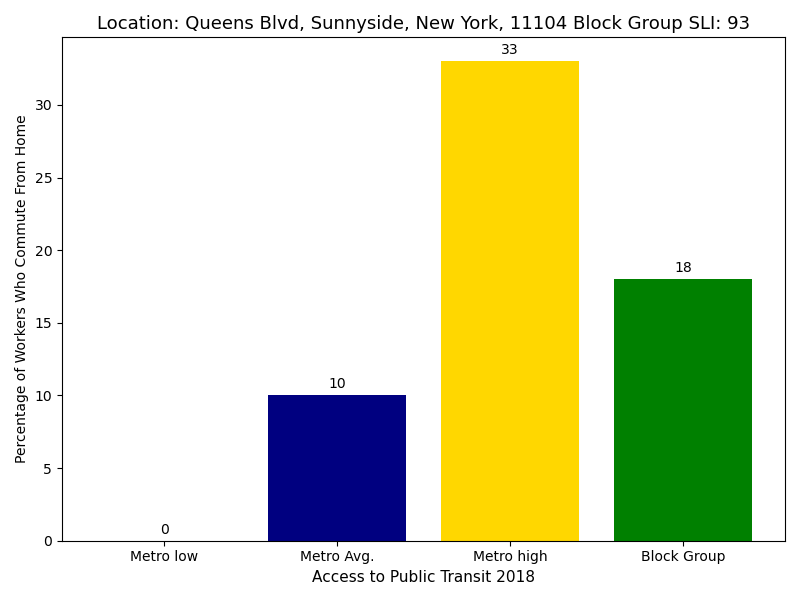

In [160]:
# Plotting Graphs According to Values & Counties Set Forth (Queens)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group']
values = [0, 10, 33, 18]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green'])

# Add labels and title
ax.set_xlabel('Access to Public Transit 2018', fontsize=11)
ax.set_ylabel('Percentage of Workers Who Commute From Home', fontsize=10, wrap=True)
ax.set_title('Location: Queens Blvd, Sunnyside, New York, 11104 Block Group SLI: 93', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

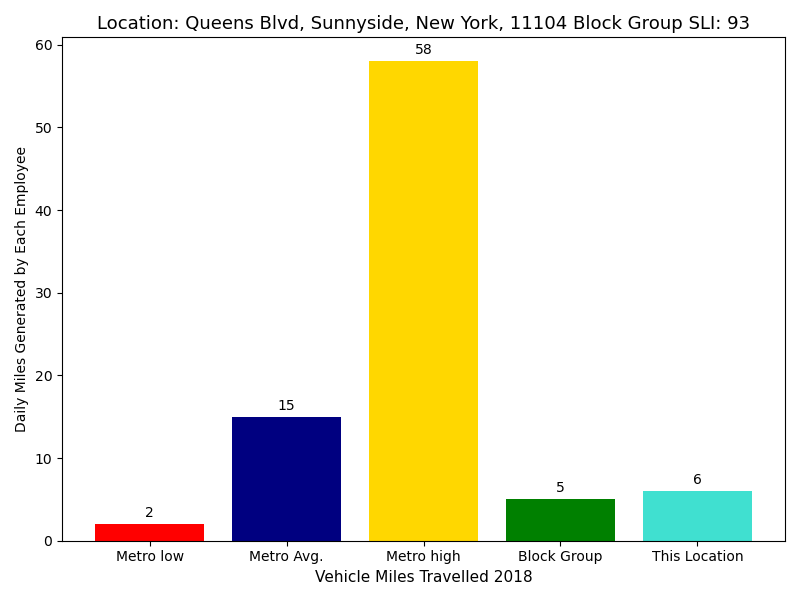

In [161]:
# Daily Miles Generated By Each Employee (Queens)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [2, 15, 58, 5, 6]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Vehicle Miles Travelled 2018', fontsize=11)
ax.set_ylabel('Daily Miles Generated by Each Employee', fontsize=10, wrap=True)
ax.set_title('Location: Queens Blvd, Sunnyside, New York, 11104 Block Group SLI: 93', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

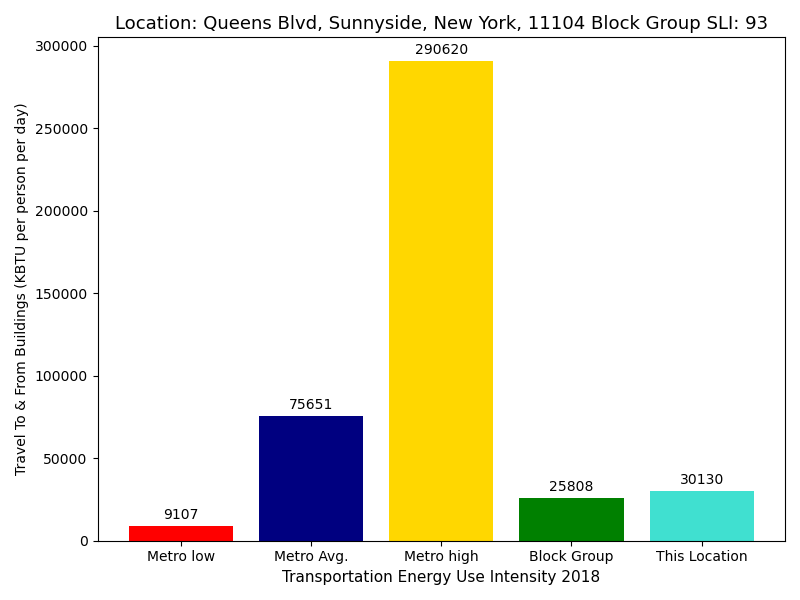

In [162]:
# Transportation Energy Use Intensity (Queens)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [9107, 75651, 290620, 25808, 30130]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Transportation Energy Use Intensity 2018', fontsize=11)
ax.set_ylabel('Travel To & From Buildings (KBTU per person per day)', fontsize=10, wrap=True)
ax.set_title('Location: Queens Blvd, Sunnyside, New York, 11104 Block Group SLI: 93', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

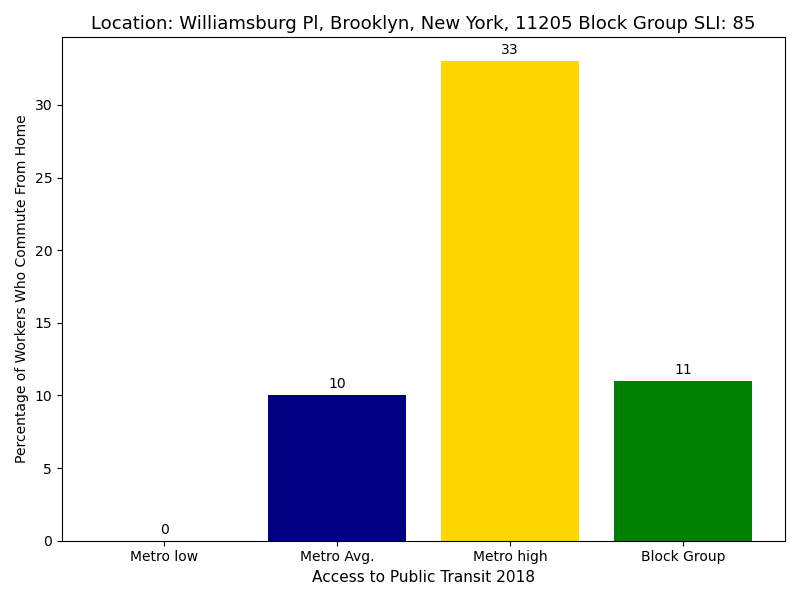

In [163]:
# Plotting Graphs According to Values & Counties Set Forth (Brooklyn)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group']
values = [0, 10, 33, 11]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green'])

# Add labels and title
ax.set_xlabel('Access to Public Transit 2018', fontsize=11)
ax.set_ylabel('Percentage of Workers Who Commute From Home', fontsize=10, wrap=True)
ax.set_title('Location: Williamsburg Pl, Brooklyn, New York, 11205 Block Group SLI: 85', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

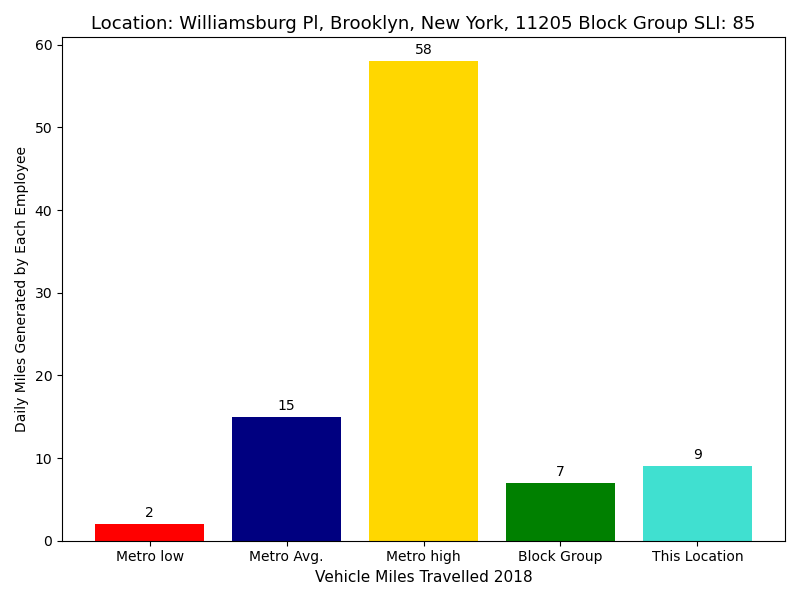

In [164]:
# Daily Miles Generated By Each Employee (Brooklyn)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [2, 15, 58, 7, 9]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Vehicle Miles Travelled 2018', fontsize=11)
ax.set_ylabel('Daily Miles Generated by Each Employee', fontsize=10, wrap=True)
ax.set_title('Location: Williamsburg Pl, Brooklyn, New York, 11205 Block Group SLI: 85', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

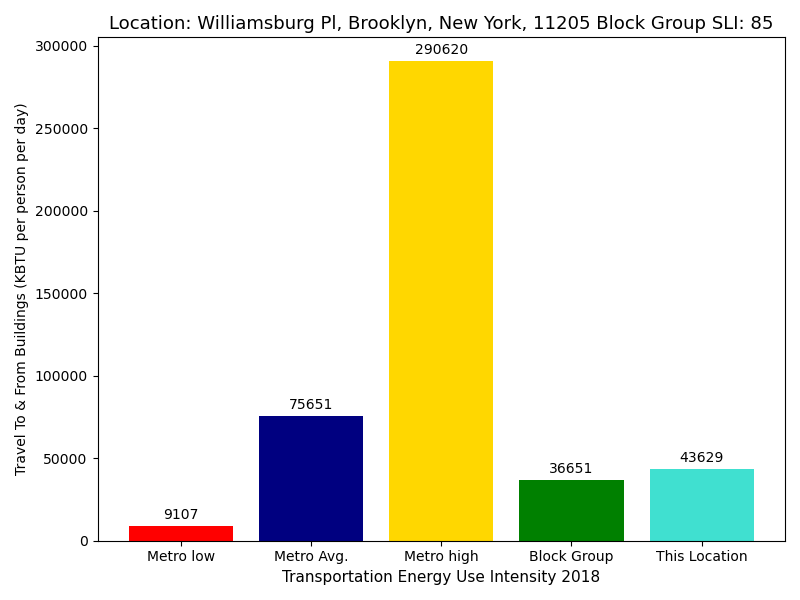

In [165]:
# Transportation Energy Use Intensity (Brooklyn)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [9107, 75651, 290620, 36651, 43629]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Transportation Energy Use Intensity 2018', fontsize=11)
ax.set_ylabel('Travel To & From Buildings (KBTU per person per day)', fontsize=10, wrap=True)
ax.set_title('Location: Williamsburg Pl, Brooklyn, New York, 11205 Block Group SLI: 85', fontsize=13)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

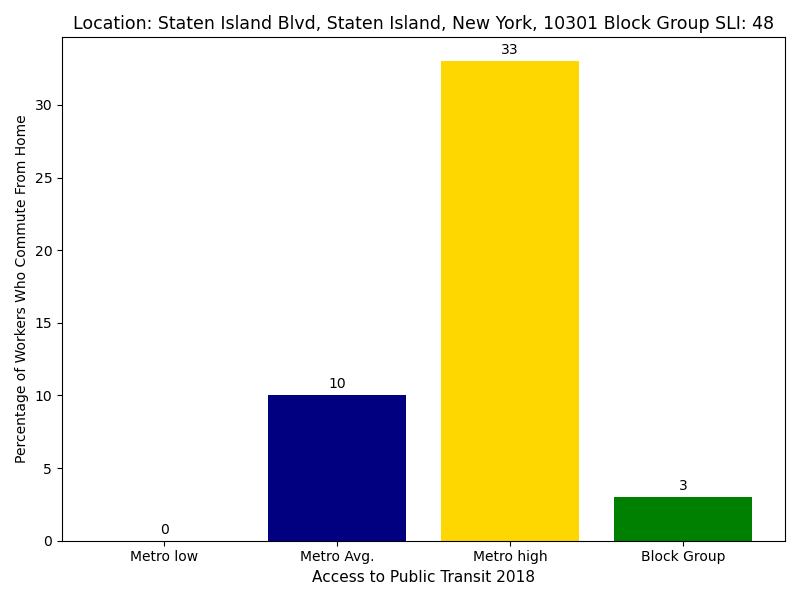

In [166]:
# Plotting Graphs According to Values & Counties Set Forth (Richmond - Staten Island)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group']
values = [0, 10, 33, 3]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green'])

# Add labels and title
ax.set_xlabel('Access to Public Transit 2018', fontsize=11)
ax.set_ylabel('Percentage of Workers Who Commute From Home', fontsize=10, wrap=True)
ax.set_title('Location: Staten Island Blvd, Staten Island, New York, 10301 Block Group SLI: 48', fontsize=12.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

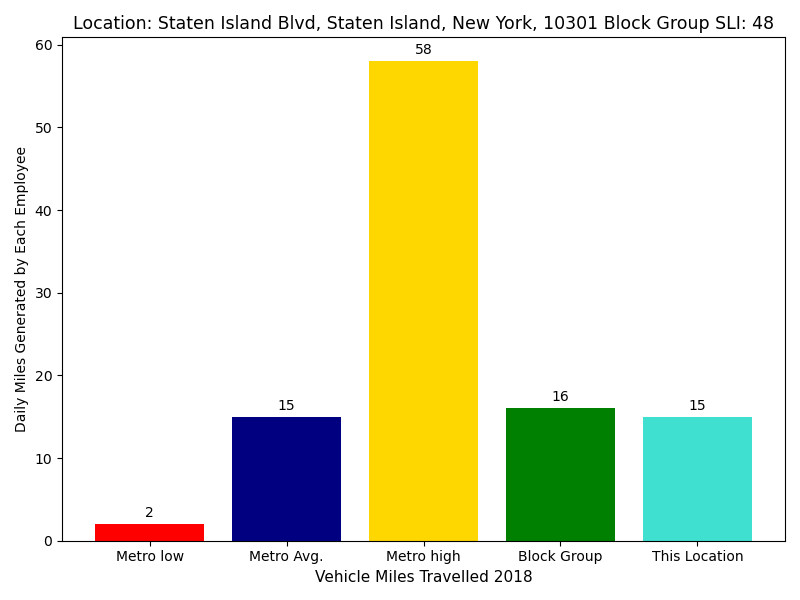

In [167]:
# Daily Miles Generated By Each Employee (Richmond - Staten Island)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [2, 15, 58, 16, 15]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Vehicle Miles Travelled 2018', fontsize=11)
ax.set_ylabel('Daily Miles Generated by Each Employee', fontsize=10, wrap=True)
ax.set_title('Location: Staten Island Blvd, Staten Island, New York, 10301 Block Group SLI: 48', fontsize=12.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()

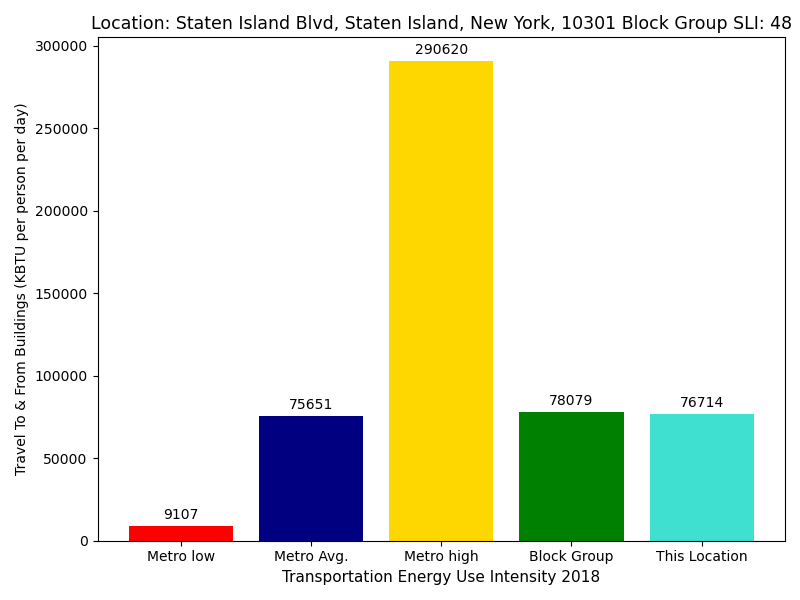

In [168]:
# Transportation Energy Use Intensity (Richmond - Staten Island)

locations = ['Metro low', 'Metro Avg.', 'Metro high', 'Block Group', 'This Location']
values = [9107, 75651, 290620, 78079, 76714]

# Create a figure and 2D axis
fig, ax = plt.subplots(figsize=(8, 6))

# Create the bar chart
bars = ax.bar(locations, values, color=['red', 'navy', 'gold', 'green', 'turquoise'])

# Add labels and title
ax.set_xlabel('Transportation Energy Use Intensity 2018', fontsize=11)
ax.set_ylabel('Travel To & From Buildings (KBTU per person per day)', fontsize=10, wrap=True)
ax.set_title('Location: Staten Island Blvd, Staten Island, New York, 10301 Block Group SLI: 48', fontsize=12.5)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Adjust layout and display
plt.tight_layout()
plt.show()